In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
# reading .csv file
df=pd.read_csv('./DataAnalyst.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(2253, 15)

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\r\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\r\n\r\nProvides analytical and techni...,3.8,Visiting Nurse Service of New York\r\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\r\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\r\nRemote:Yes\r\n...,4.1,Celerity\r\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\r\n\r\nFanDuel Group is a ...,3.9,FanDuel\r\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [5]:
df.column()

AttributeError: 'DataFrame' object has no attribute 'column'

In [6]:
df.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,Data Analyst,$41K-$78K (Glassdoor est.),Chime is the largest and fastest-growing playe...,NaN,"Staffigo Technical Services, LLC\r\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
categories = ['Job Title', 'Salary Estimate', 'Location', 'Sector']
new_df = df[categories]
print(new_df)

                                              Job Title  \
0     Data Analyst, Center on Immigration and Justic...   
1                                  Quality Data Analyst   
2     Senior Data Analyst, Insights & Analytics Team...   
3                                          Data Analyst   
4                                Reporting Data Analyst   
...                                                 ...   
2248  RQS - IHHA - 201900004460 -1q Data Security An...   
2249              Senior Data Analyst (Corporate Audit)   
2250  Technical Business Analyst (SQL, Data analytic...   
2251                Data Analyst 3, Customer Experience   
2252                        Senior Quality Data Analyst   

                  Salary Estimate        Location  \
0      $37K-$66K (Glassdoor est.)    New York, NY   
1      $37K-$66K (Glassdoor est.)    New York, NY   
2      $37K-$66K (Glassdoor est.)    New York, NY   
3      $37K-$66K (Glassdoor est.)    New York, NY   
4      $37K-$66K (Glassdoo

In [8]:
new_df = new_df.replace(-1, np.nan)
new_df = new_df.replace(-1.0, np.nan)
new_df = new_df.replace('-1', np.nan)

In [9]:
new_df['Job Title'].value_counts()

Data Analyst                                                           405
Senior Data Analyst                                                     90
Junior Data Analyst                                                     30
Business Data Analyst                                                   28
Sr. Data Analyst                                                        21
                                                                      ... 
Data Analyst Senior                                                      1
Business Systems Analyst III - Data Engineering(Lead Product Owner)      1
R & Python / Sr. Information Data Analyst                                1
Clinical Practice Data Analyst Specialist                                1
Data & Reporting Analyst, Distribution Planning & Operations             1
Name: Job Title, Length: 1272, dtype: int64

In [10]:
new_df['Salary Estimate'].value_counts()

$42K-$76K (Glassdoor est.)    57
$41K-$78K (Glassdoor est.)    57
$50K-$86K (Glassdoor est.)    41
$35K-$67K (Glassdoor est.)    33
$43K-$76K (Glassdoor est.)    31
                              ..
$31K-$59K (Glassdoor est.)     4
$47K-$81K (Glassdoor est.)     3
$43K-$77K (Glassdoor est.)     3
$36K-$67K (Glassdoor est.)     3
$57K-$70K (Glassdoor est.)     2
Name: Salary Estimate, Length: 89, dtype: int64

In [11]:
new_df['Location'].value_counts()

New York, NY          310
Chicago, IL           130
San Francisco, CA     119
Austin, TX             81
Los Angeles, CA        80
                     ... 
Montvale, NJ            1
San Fernando, CA        1
East Palo Alto, CA      1
Iselin, NJ              1
Jeffersonville, IN      1
Name: Location, Length: 253, dtype: int64

In [12]:
new_df['Sector'].value_counts().head(10)

Information Technology    570
Business Services         524
Finance                   169
Health Care               151
Education                  52
Insurance                  51
Accounting & Legal         43
Media                      42
Manufacturing              40
Retail                     38
Name: Sector, dtype: int64

In [13]:
print(new_df[new_df['Sector'] == "-1"])

Empty DataFrame
Columns: [Job Title, Salary Estimate, Location, Sector]
Index: []


In [14]:
print(new_df['Salary Estimate'])

0        $37K-$66K (Glassdoor est.)
1        $37K-$66K (Glassdoor est.)
2        $37K-$66K (Glassdoor est.)
3        $37K-$66K (Glassdoor est.)
4        $37K-$66K (Glassdoor est.)
                   ...             
2248    $78K-$104K (Glassdoor est.)
2249    $78K-$104K (Glassdoor est.)
2250    $78K-$104K (Glassdoor est.)
2251    $78K-$104K (Glassdoor est.)
2252    $78K-$104K (Glassdoor est.)
Name: Salary Estimate, Length: 2253, dtype: object


In [15]:
salary_split = new_df['Salary Estimate'].str.split('(', n=1)
new_df['Salary Estimate'] = salary_split.str[0]

dash_salary_split = new_df['Salary Estimate'].str.split('-', n=1)
new_df['Min_Salary'], new_df['Max_Salary'] = dash_salary_split.str[0], dash_salary_split.str[1]
new_df['Min_Salary'] = new_df['Min_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
new_df['Max_Salary'] = new_df['Max_Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

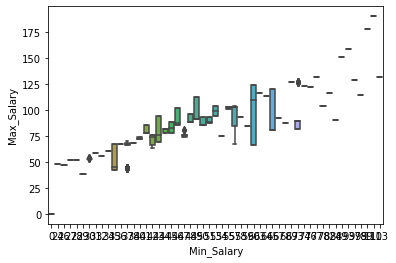

In [16]:
sns.boxplot(x='Min_Salary', y='Max_Salary', data=new_df)

In [17]:
new_df['Est_Salary'] = (new_df['Min_Salary'] + new_df['Max_Salary']) / 2
print(new_df.head(100))

                                            Job Title Salary Estimate  \
0   Data Analyst, Center on Immigration and Justic...      $37K-$66K    
1                                Quality Data Analyst      $37K-$66K    
2   Senior Data Analyst, Insights & Analytics Team...      $37K-$66K    
3                                        Data Analyst      $37K-$66K    
4                              Reporting Data Analyst      $37K-$66K    
..                                                ...             ...   
95                                       Data Analyst      $51K-$87K    
96                                       Data Analyst      $51K-$87K    
97                              Business Data Analyst      $51K-$87K    
98                                       Data Analyst      $51K-$87K    
99                            Healthcare Data Analyst      $51K-$87K    

        Location                            Sector  Min_Salary  Max_Salary  \
0   New York, NY                        Non-P

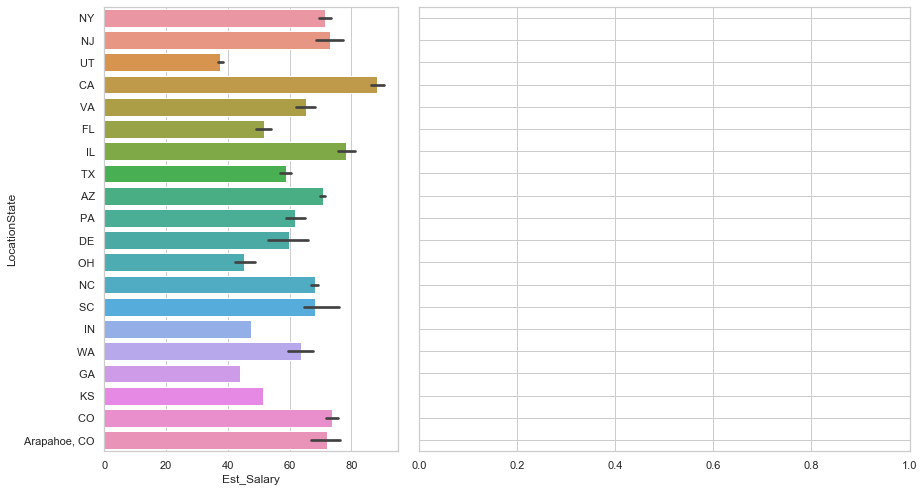

In [18]:
city_state_split = new_df['Location'].str.split(',', n=1)
new_df['City'], new_df['State'] = city_state_split.str[0], city_state_split.str[1]
new_df['LocationState'] = new_df['State'].replace('NY (US), NY','NY')

sns.set(style="whitegrid")
f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)}, figsize=(13,7))

sns.barplot(x='Est_Salary',y='LocationState',data=new_df,ax=ax_bar)
#sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

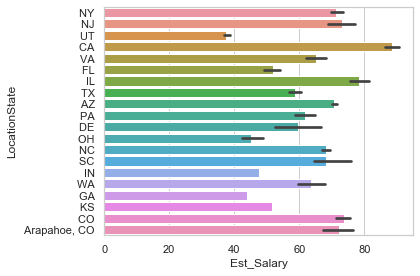

In [19]:
city_state_split = new_df['Location'].str.split(',', n=1)
new_df['City'], new_df['State'] = city_state_split.str[0], city_state_split.str[1]
new_df['LocationState'] = new_df['State'].replace('NY (US), NY','NY')

sns.set(style="whitegrid")
#f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)}, figsize=(13,7))

sns.barplot(x='Est_Salary',y='LocationState',data=new_df)
#sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

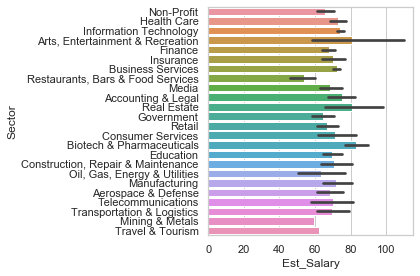

In [20]:
sns.set(style="whitegrid")
#f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))

sns.barplot(x='Est_Salary',y='Sector',data=new_df)
#sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.tight_layout()

In [21]:
df.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,Data Analyst,$41K-$78K (Glassdoor est.),Chime is the largest and fastest-growing playe...,NaN,"Staffigo Technical Services, LLC\r\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


[]

C:\Users\Ragnar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12304 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ragnar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ragnar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20445 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ragnar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ragnar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Ragnar\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 23601 missing 

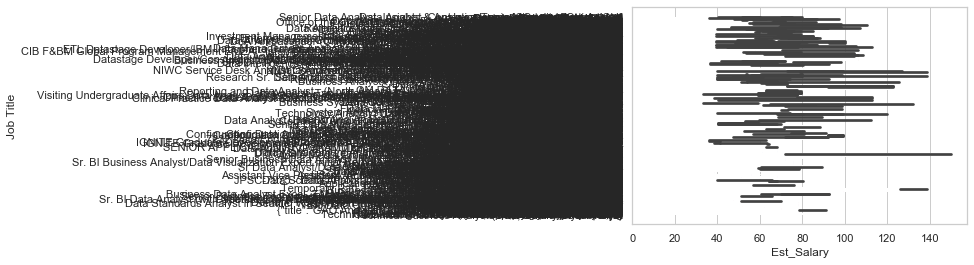

In [22]:
sns.set(style="whitegrid")
#f, (ax_bar, ax_point) = plt.subplots(ncols=2, sharey=True, gridspec_kw= {"width_ratios":(0.6,1)},figsize=(13,7))

sns.barplot(x='Est_Salary',y='Job Title',data=new_df)
#sns.pointplot(x='Est_Salary',y='HQState',data=HQCount, join=False,ax=ax_point).set(ylabel="",xlabel="Salary ($'000)")

plt.plot()

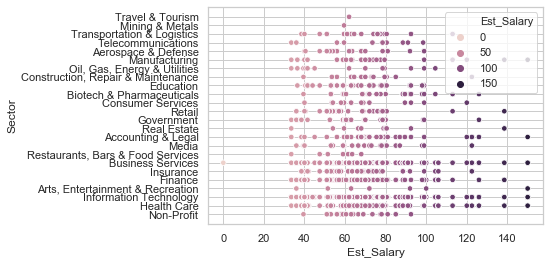

In [23]:
sns.scatterplot(x='Est_Salary', y='Sector', data=new_df, hue='Est_Salary', s = 30)


In [24]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(new_df['Est_Salary'], new_df[])

SyntaxError: invalid syntax (<ipython-input-24-70d89a8cbcee>, line 2)

In [1]:
randomforest_regression_r2 = {'RF_r2_N10': 0.7763266499582282,
 'RF_r2_N100': 0.8347831924255078,
 'RF_r2_N1000': 0.8424529497240262}

randomforest_regression_oob = {'RF_oob_N10': -0.1046978664853111,
 'RF_oob_N100': 0.12129665648748027,
 'RF_oob_N1000': 0.13688244879543665}

randomforest_regression_validation = {'RF_r2_validation_N10': -0.010101010101010676,
 'RF_r2_validation_N100': -0.010101010101010676,
 'RF_r2_validation_N1000': -0.010101010101010676}

randomforest_pipeline = {'RF_pipeline': 0.7874852442898624}

